<a href="https://colab.research.google.com/github/Samrajan2919/SAM/blob/master/happy_monk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
#reshape data from 3-D to 2-D array
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
#fit and transform training dataset
X_train = minmax.fit_transform(X_train)

In [ ]:
X_test = minmax.transform(X_test)

In [ ]:
len(np.unique(y_train))

10

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

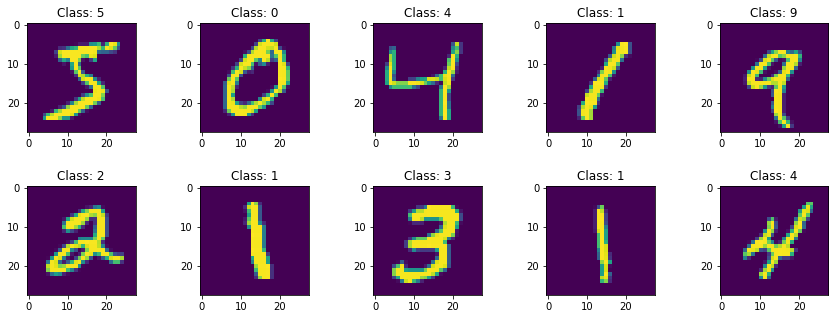

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [ ]:
classifier = Sequential()
classifier.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))

In [ ]:
classifier.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))

In [ ]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [ ]:
pip install livelossplot

In [ ]:
from livelossplot import PlotLossesKeras

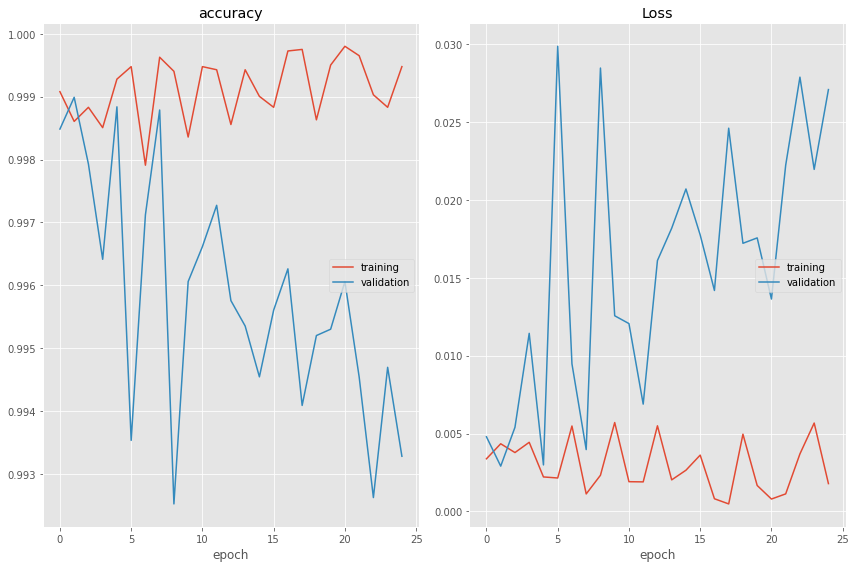

accuracy
	training         	 (min:    0.998, max:    1.000, cur:    0.999)
	validation       	 (min:    0.993, max:    0.999, cur:    0.993)
Loss
	training         	 (min:    0.000, max:    0.006, cur:    0.002)
	validation       	 (min:    0.003, max:    0.030, cur:    0.027)


In [ ]:
classifier_fit = classifier.fit(X_train, y_train, validation_split=0.33,epochs=25,validation_data=(X_test,y_test),callbacks=[PlotLossesKeras()],verbose=0)

In [ ]:
f_sc= f1_score(y_test, classifier.predict_classes(X_test), average='micro')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
 roc_sc = roc_auc_score(y_test, classifier.predict_proba(X_test), multi_class='ovo')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
test_loss_e25 = classifier.evaluate(X_test, y_test, verbose=0)

In [ ]:
import pandas as pd


In [ ]:
stats_e25 = pd.DataFrame({'Test accuracy' :  round(test_loss_e25[1]*100,3),
                      'F1 score'      : round(f_sc,3),
                      'ROC AUC score' : round(roc_sc,3),
                      'Total Loss'    : round(test_loss_e25[0],3)}, index=[0])

In [ ]:
display(stats_e25)

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,98.16,0.982,0.99,35.924


In [ ]:
print(classifier_fit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


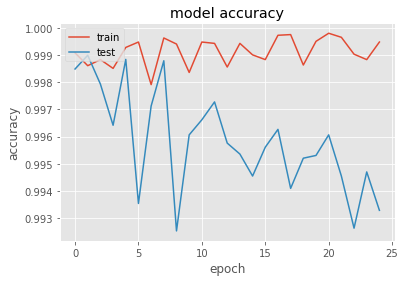

In [ ]:
plt.plot(classifier_fit.history['accuracy'])
plt.plot(classifier_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


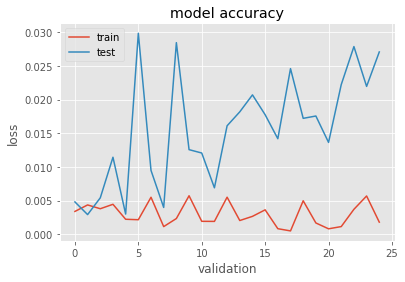

In [ ]:
plt.plot(classifier_fit.history['loss'])
plt.plot(classifier_fit.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('validation')
plt.legend(['train','test'],loc='upper left')
plt.show()